In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dk = pd.read_csv(r'D:\loan_prediction.csv')
dk.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dk.shape

(614, 13)

In [4]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:

#To check null values


In [8]:
dk.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
dk.groupby('Self_Employed')['Self_Employed'].count()

Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

In [7]:
dk.groupby('Credit_History')['Credit_History'].count()

Credit_History
0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [10]:
#To reomive loanid column which is unnecessory

In [11]:
convert_to_float = lambda x: float(x[2:]) if x.startswith("LP") and x[2:].isdigit() else None

In [13]:
dk['new_loanid']=dk['Loan_ID'].apply(convert_to_float )

In [14]:
dk

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,new_loanid
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1002.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2978.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,2979.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2983.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2984.0


In [15]:
dk1=dk.drop('Loan_ID',axis = 1)

In [16]:
dk1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,new_loanid
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1002.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1003.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1005.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1006.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1008.0


In [17]:
# To remove nullvalues in less than 5% nullpercentcolumns
nacolumns=['Gender','Married','Dependents','LoanAmount','Loan_Amount_Term']
dk2=dk1.dropna(subset=nacolumns)

In [18]:
dk2.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
new_loanid            0
dtype: int64

In [19]:
dk2['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [20]:
dk2['Self_Employed']=dk2['Self_Employed'].fillna(dk2['Self_Employed'].mode()[0])

C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\1919364564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk2['Self_Employed']=dk2['Self_Employed'].fillna(dk2['Self_Employed'].mode()[0])


In [21]:
dk2.groupby('Credit_History')['Credit_History'].count()


Credit_History
0.0     71
1.0    434
Name: Credit_History, dtype: int64

In [23]:
dk2['Credit_History']=dk2['Credit_History'].fillna(dk2['Credit_History'].mode()[0])

C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\4267796549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk2['Credit_History']=dk2['Credit_History'].fillna(dk2['Credit_History'].mode()[0])


In [24]:
dk2.isnull().sum() 

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
new_loanid           0
dtype: int64

In [25]:
dk2.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,new_loanid
219,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,1.0,Semiurban,Y,1734.0
93,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban,Y,1322.0
283,Female,No,0,Graduate,No,1811,1666.0,54.0,360.0,1.0,Urban,Y,1917.0
534,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban,Y,2731.0
415,Female,No,0,Graduate,No,2995,0.0,60.0,360.0,1.0,Urban,Y,2337.0


In [26]:
dk2['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [27]:
dk2['Dependents'] = dk2['Dependents'].replace(to_replace='3+',value='4')

C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\399910839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk2['Dependents'] = dk2['Dependents'].replace(to_replace='3+',value='4')


In [29]:
dk2['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [30]:
dk2['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [31]:
#To convert categorical into numerical
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
dk2['Property_Area'] = lr.fit_transform(dk2['Property_Area'])
dk2['Gender'] = lr.fit_transform(dk2['Gender'])
dk2['Married'] = lr.fit_transform(dk2['Married'])
dk2['Education'] = lr.fit_transform(dk2['Education'])
dk2['Self_Employed'] = lr.fit_transform(dk2['Self_Employed'])
dk2['Loan_Status'] = lr.fit_transform(dk2['Loan_Status'])

C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\3374207831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk2['Property_Area'] = lr.fit_transform(dk2['Property_Area'])
C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\3374207831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk2['Gender'] = lr.fit_transform(dk2['Gender'])
C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\3374207831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [32]:
dk2.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,new_loanid
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1003.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1005.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1006.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1008.0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,1011.0
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,1013.0
7,1,1,4,0,0,3036,2504.0,158.0,360.0,0.0,1,0,1014.0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,1018.0
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,1020.0
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1,1024.0


In [34]:
dk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int32  
 1   Married            553 non-null    int32  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int32  
 4   Self_Employed      553 non-null    int32  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    int32  
 11  Loan_Status        553 non-null    int32  
 12  new_loanid         553 non-null    float64
dtypes: float64(5), int32(6), int64(1), object(1)
memory usage: 47.5+ KB


In [35]:
dk2[['ApplicantIncome','CoapplicantIncome']].describe()

,ApplicantIncome,CoapplicantIncome
count,553.000000,553.000000
mean,5350.018083,1659.119204
std,5965.429068,3043.448229
min,150.000000,0.000000
25%,2889.000000,0.000000
50%,3812.000000,1213.000000
75%,5815.000000,2306.000000
max,81000.000000,41667.000000


C:\Users\Asus-2022\AppData\Local\Temp\ipykernel_31296\2182534118.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dk2.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


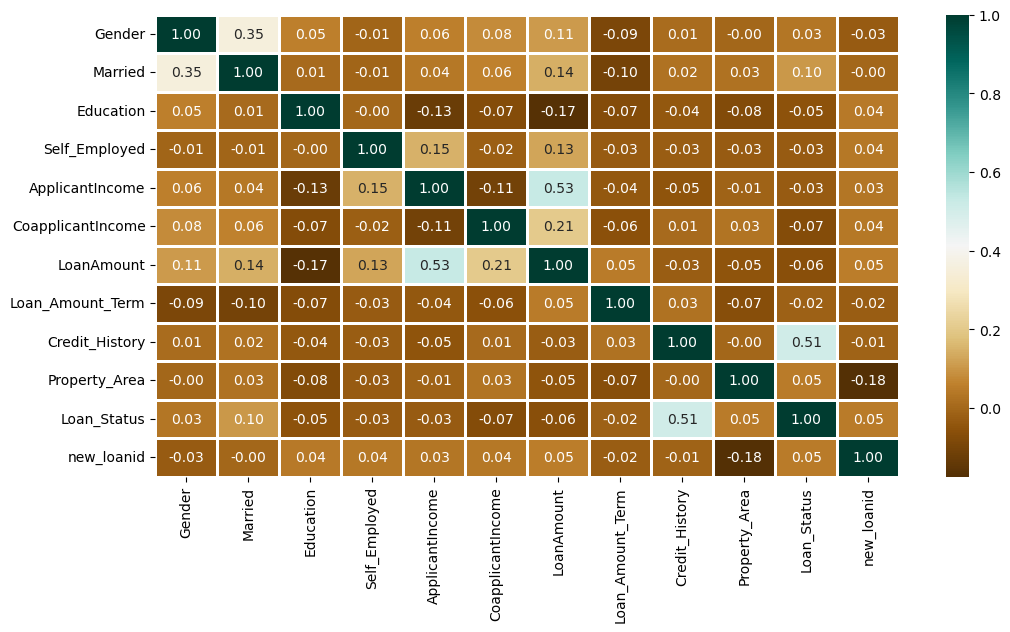

In [36]:
# heatmap to see corelation b/w features.
plt.figure(figsize=(12,6))
sns.heatmap(dk2.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)
plt.show()

In [37]:
# Defining feature column and Target column
x = dk2.drop('Loan_Status',axis=1)
y = dk2['Loan_Status']

In [38]:
# To give scaling to numbers
sccol = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x[sccol] = st.fit_transform(x[sccol])
x[sccol]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,-0.128694,-0.049699,-0.214368,0.279961
2,-0.394296,-0.545638,-0.952675,0.279961
3,-0.464262,0.229842,-0.309634,0.279961
4,0.109057,-0.545638,-0.059562,0.279961
5,0.011239,0.834309,1.440866,0.279961
...,...,...,...,...
609,-0.411075,-0.545638,-0.893134,0.279961
610,-0.208727,-0.545638,-1.262287,-2.468292
611,0.456706,-0.466709,1.274152,0.279961
612,0.374659,-0.545638,0.488213,0.279961


In [39]:
import warnings
warnings.filterwarnings('ignore')


In [40]:
#Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np


In [41]:
modelset ={}
def model_acscore(model,x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=42)
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    print(f'{model} accuracy is {accuracy_score(ytest,y_pred)}')

    score = cross_val_score(model,x,y,cv=5)
    print(f'{model} Avg crossvalscore is {np.mean(score)}')
    modelset[model] = round(np.mean(score)*100,2)


In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model_acscore(model1,x,y)
modelset

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg crossvalscore is 0.8066011466011467


{LogisticRegression(): 80.66}

In [43]:
# Support vector machine
from sklearn import svm
model2 = svm.SVC()
model_acscore(model2,x,y)

SVC() accuracy is 0.6936936936936937
SVC() Avg crossvalscore is 0.7034398034398034


In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model_acscore(model3,x,y)

DecisionTreeClassifier() accuracy is 0.6846846846846847
DecisionTreeClassifier() Avg crossvalscore is 0.6962981162981163


In [45]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model_acscore(model4,x,y)

RandomForestClassifier() accuracy is 0.8018018018018018
RandomForestClassifier() Avg crossvalscore is 0.7668959868959869


In [46]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier()
model_acscore(model5,x,y)

GradientBoostingClassifier() accuracy is 0.7837837837837838
GradientBoostingClassifier() Avg crossvalscore is 0.6929565929565931


In [50]:
modelset


{LogisticRegression(): 80.66,
 SVC(): 70.34,
 DecisionTreeClassifier(): 69.63,
 RandomForestClassifier(): 76.69,
 GradientBoostingClassifier(): 69.3}

In [51]:
# Hyper parameter tuning for logistic reg
from sklearn.model_selection import RandomizedSearchCV
logr_para={'C':np.logspace(-4,4,20),
           'solver': ['liblinear','lbfgs','newton-cholesky']}
rs_logr = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=logr_para,
                           n_iter=20,cv=5,verbose=True)
rs_logr.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cholesky']},
                   verbose=True)

In [52]:
rs_logr.best_score_

0.8066011466011467

In [53]:
rs_logr.best_params_

{'solver': 'lbfgs', 'C': 29.763514416313132}

In [54]:
# Hyper parameter tuning for svm model
svm_para={'C':[0.25,0.50,0.75,1],
          'kernel':['linear','rbf']}
rs_svm = RandomizedSearchCV(svm.SVC(),param_distributions=svm_para,
                            cv=5,n_iter=20,verbose=True)
rs_svm.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear', 'rbf']},
                   verbose=True)

In [55]:
rs_svm.best_score_

0.8066011466011467

In [56]:
rs_svm.best_params_

{'kernel': 'linear', 'C': 0.25}

In [57]:
# Hyper parameter for Random forest classifier
rf_para = {'n_estimators':np.arange(10,1000,10),
           'max_features':['auto','sqrt'],
           'max_depth':[None,3,5,10,20,30],
           'min_samples_split':[2,5,20,50,100],
           'min_samples_leaf':[1,2,5,10]}

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_para,
                           cv=5,n_iter=20,verbose=True)
rs_rf.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [58]:
rs_rf.best_score_

0.8066011466011467

In [59]:
rs_rf.best_params_

{'n_estimators': 230,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 3}

In [60]:
# selecting Random forest as final best model and use its best parameters
# so we selected Random forest classifier is the best model for this datset
  # its accuracy score is 80.84
rf_final =RandomForestClassifier(n_estimators=270,
                           min_samples_split=5,
                           min_samples_leaf=5,
                           max_features='sqrt',
                           max_depth=5)
rf_final.fit(x,y)
model_acscore(rf_final,x,y)


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270) accuracy is 0.8018018018018018
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270) Avg crossvalscore is 0.8047993447993449
